# Garmin Rowing Report

In [1]:
import tcxtools
import graph
import helper
import correlation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# TCX and CSV files name without extension

In [2]:
filename = 'activity_5292407865'

# Reading .TCX file

In [3]:
tcx_data = tcxtools.TCXPandas('./rowing/' + filename + '.tcx')
tracks, laps = tcx_data.parse()
tracks = tracks.set_index('time')

# Reading .CSV file

In [4]:
csv_data = pd.read_csv('./rowing/' + filename + '.csv')

# Calculating time in seconds
csv_data['Time (s)'] = csv_data['Time'].apply(helper.get_sec)

# Calculating Power in watts
csv_data['Power (w)'] = csv_data['Calories'] * 4184 / csv_data['Time (s)']

# Calculating Energy in kilojoules
csv_data['Energy (kj)'] = (csv_data['Power (w)'] * csv_data['Time (s)']) / 1000

csv = csv_data.head(-1)
csv = csv[~(csv['Calories'] == 0)]

In [5]:
csv

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg HR,Max HR,Avg Stroke Rate,Max Stroke Rate,Avg Distance per Stroke,Calories,Best Pace,Moving Time,Avg Moving Pace,Time (s),Power (w),Energy (kj)
0,1,2:49.0,2:49.0,503,2:48,120,130,17,28,10.12,18,2:02,2:49,2:48,169,445.633136,75.312
1,2,2:38.0,5:27.0,498,2:39,136,150,18,22,10.07,23,1:55,2:38,2:39,158,609.063291,96.232
2,3,2:48.0,8:15.0,501,2:48,143,151,20,25,8.94,26,1:56,2:48.0,2:48,168,647.523810,108.784
3,4,4:04.0,12:19,499,4:04,127,154,20,24,8.30,28,1:57,3:19,3:19,244,480.131148,117.152
4,5,2:42.0,15:01,499,2:42,137,156,20,36,9.11,21,1:58,2:42.0,2:42,162,542.370370,87.864
5,6,3:48.0,18:49,501,3:48,130,158,20,25,8.97,26,1:48,3:13,3:13,228,477.122807,108.784
6,7,4:16.0,23:05,502,4:15,132,163,22,26,8.81,30,1:53,3:05,3:04,256,490.312500,125.520
7,8,2:38.0,25:43,499,2:38,132,151,21,26,8.91,18,1:56,2:38,2:38,158,476.658228,75.312
8,9,2:35.0,28:18,501,2:35,150,169,23,30,8.34,24,1:45,2:35.0,2:35,155,647.845161,100.416
9,10,2:51.0,31:09,498,2:52,163,175,25,39,7.12,30,1:51,2:49,2:50,171,734.035088,125.520


# Laps

In [6]:
laps = laps[~(laps['calories'] == 0)]

# Calculating energy (kilojoules)
laps['energy (kj)'] = (laps['power (w)'] * laps['time (s)']) / 1000

# Calculating calories per second
laps['avg cal/s'] = laps['calories'] / laps['time (s)']

laps

,time (s),distance (m),max speed (m/s),max speed (km/h),calories,avg hr,max hr,power (w),energy (kj),avg cal/s
0,169,502.94,4.106,14.782,18,120,130,445.633,75.311977,0.106509
1,158,498.19,4.348,15.653,23,136,150,609.063,96.231954,0.145570
2,168,500.62,4.320,15.552,26,143,151,647.524,108.784032,0.154762
3,244,499.46,4.283,15.419,28,127,154,480.131,117.151964,0.114754
4,162,499.11,4.236,15.250,21,137,156,542.370,87.863940,0.129630
5,228,500.67,4.619,16.628,26,130,158,477.123,108.784044,0.114035
6,256,502.08,4.432,15.955,30,132,163,490.312,125.519872,0.117188
7,158,498.61,4.301,15.484,18,132,151,476.658,75.311964,0.113924
8,155,500.60,4.740,17.064,24,150,169,647.845,100.415975,0.154839
9,171,498.02,4.497,16.189,30,163,175,734.035,125.519985,0.175439


In [7]:
laps['avg cal/s'].describe()

count    12.000000
mean      0.127072
std       0.026570
min       0.077193
25%       0.114007
50%       0.119103
75%       0.147868
max       0.175439
Name: avg cal/s, dtype: float64

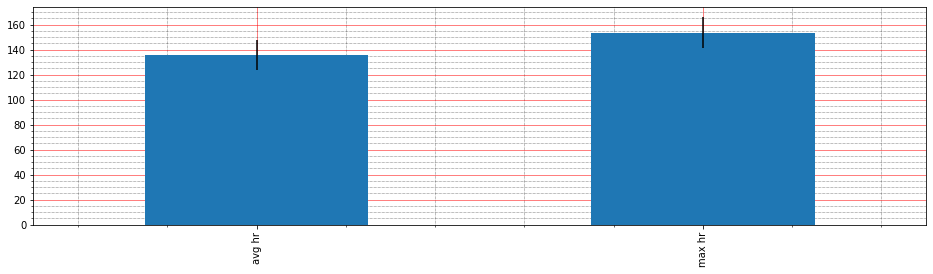

In [8]:
graph.mean(laps[['avg hr', 'max hr']])

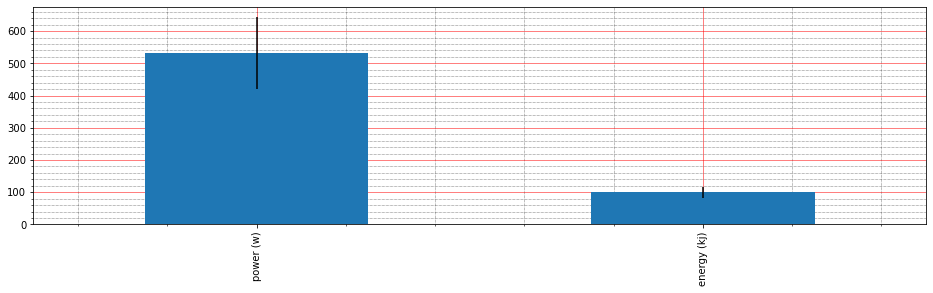

In [9]:
graph.mean(laps[['power (w)', 'energy (kj)']])

# Tracking points

In [10]:
# droping NaN
tracks.dropna(inplace=True)

# renaming column
tracks.rename(columns={'distance':'distance cumulative'}, inplace=True)

# Getting the distance at each tracking point
tracks['distance'] = tracks['distance cumulative'].diff()

tracks

,latitude,longitude,distance cumulative,hr,speed (m/s),speed (km/h),distance
time,,,,,,,
2020-07-28 10:16:37+00:00,-15.827320,-47.884584,3.380000,113,3.163,11.3868,NaN
2020-07-28 10:16:38+00:00,-15.827340,-47.884599,6.160000,113,2.277,8.1972,2.780000
2020-07-28 10:16:39+00:00,-15.827359,-47.884611,8.560000,112,2.771,9.9756,2.400001
2020-07-28 10:16:40+00:00,-15.827385,-47.884629,12.020000,113,4.087,14.7132,3.460000
2020-07-28 10:16:41+00:00,-15.827408,-47.884647,15.210000,114,2.314,8.3304,3.190000
...,...,...,...,...,...,...,...
2020-07-28 10:55:04+00:00,-15.824027,-47.882847,5859.529785,123,1.969,7.0884,1.619629
2020-07-28 10:55:05+00:00,-15.824013,-47.882850,5861.129883,121,1.204,4.3344,1.600098
2020-07-28 10:55:06+00:00,-15.824004,-47.882854,5862.200195,121,1.036,3.7296,1.070312


# Distance at each tracking point

In [11]:
tracks['distance'].describe()

count    2196.000000
mean        2.668802
std         1.377897
min         0.000000
25%         2.229980
50%         2.880371
75%         3.312500
max         8.379883
Name: distance, dtype: float64

# Total Distance (meters)

In [12]:
round(tracks['distance cumulative'].tail(1).values[0], 3)

5864.07

# Speed (km/h) per Tracking Point

In [13]:
speed = tracks[~(tracks['speed (km/h)'] <= 1.85)]
speed['speed (km/h)'].describe()

count    1950.000000
mean       10.165649
std         3.032510
min         1.882800
25%         8.810100
50%        10.447200
75%        12.261600
max        17.063999
Name: speed (km/h), dtype: float64

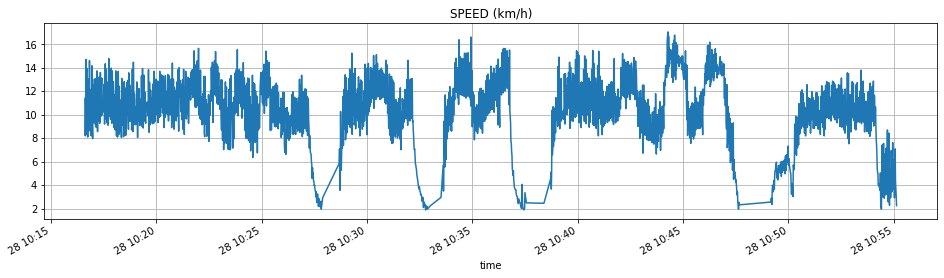

In [14]:
speed['speed (km/h)'].plot(figsize=(16,4))
plt.title('SPEED (km/h)')
plt.grid()

# Max Speed (km/h) per Lap

In [15]:
laps['max speed (km/h)'].describe()

count    12.000000
mean     15.387333
std       1.154692
min      12.866000
25%      15.133000
50%      15.518000
75%      16.013500
max      17.064000
Name: max speed (km/h), dtype: float64

# Power (watts)

In [16]:
laps['power (w)'].describe()

count     12.000000
mean     531.667750
std      111.167508
min      322.975000
25%      477.006750
50%      498.328000
75%      618.678250
max      734.035000
Name: power (w), dtype: float64

# Power (w) vs Speed (km/h)

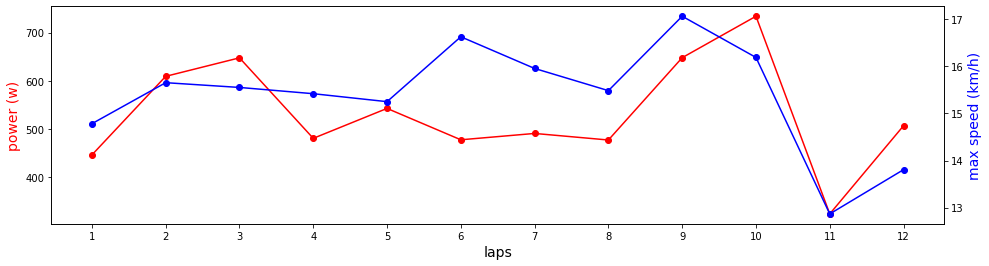

In [17]:
graph.overlay(csv.Laps, laps['power (w)'], laps['max speed (km/h)'])

# Energy (kj)

In [18]:
laps['energy (kj)'].describe()

count     12.000000
mean      99.369966
std       18.117248
min       75.311964
25%       85.771957
50%       98.323965
75%      110.876024
max      125.519985
Name: energy (kj), dtype: float64

# Energy (kj) vs Power (watts)

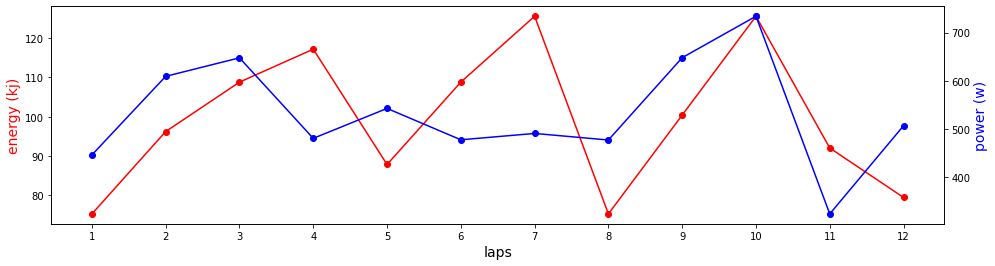

In [19]:
graph.overlay(csv.Laps, laps['energy (kj)'], laps['power (w)'])

# Energy (kj) vs Speed (km/h)

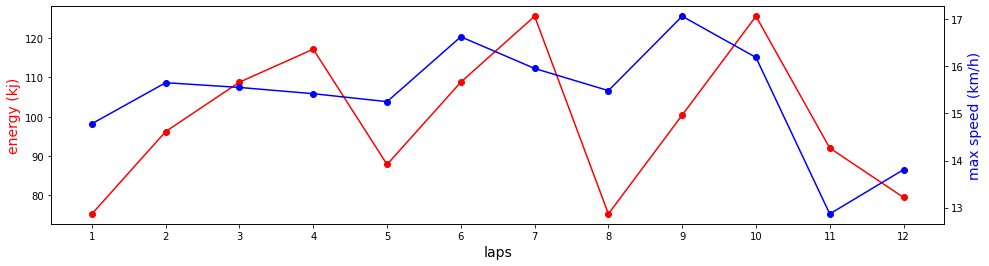

In [20]:
graph.overlay(csv.Laps, laps['energy (kj)'], laps['max speed (km/h)'])

# Heart Rate (bpm)

In [21]:
tracks['hr'].describe()

count    2197.000000
mean      134.217114
std        16.312821
min        98.000000
25%       122.000000
50%       133.000000
75%       146.000000
max       175.000000
Name: hr, dtype: float64

# Avg Heart Rate vs Power

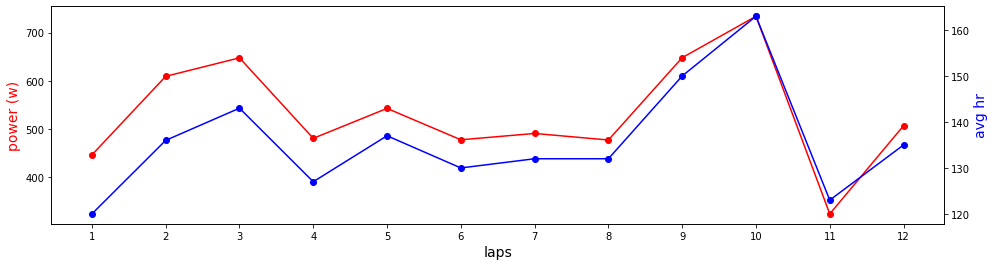

In [22]:
graph.overlay(csv.Laps, laps['power (w)'], laps["avg hr"])

# Avg Heart Rate vs Max Speed per lap

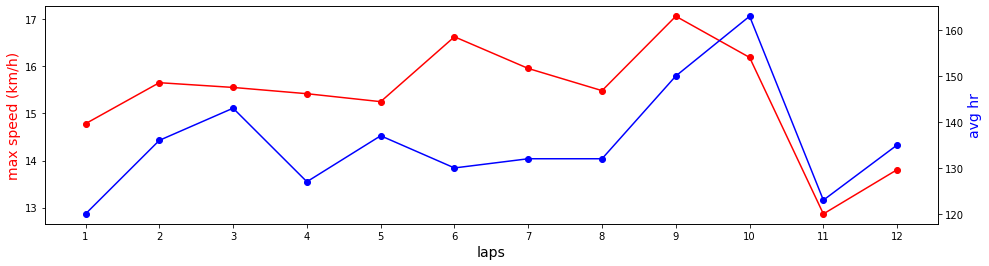

In [23]:
graph.overlay(csv.Laps, laps['max speed (km/h)'], laps["avg hr"])

# Avg Stroke Rate

In [24]:
csv['Avg Stroke Rate'].describe()

count    12.000000
mean     20.583333
std       2.108784
min      17.000000
25%      20.000000
50%      20.000000
75%      21.250000
max      25.000000
Name: Avg Stroke Rate, dtype: float64

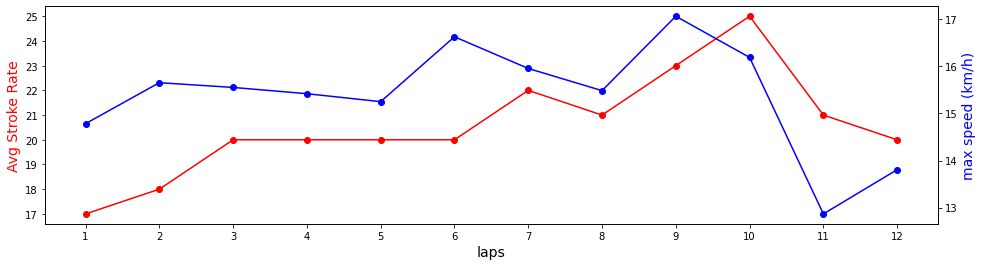

In [25]:
graph.overlay(csv.Laps, csv['Avg Stroke Rate'], laps['max speed (km/h)'])

# Max Stroke Rate

In [26]:
csv['Max Stroke Rate'].describe()

count    12.000000
mean     28.083333
std       4.925967
min      22.000000
25%      25.000000
50%      27.000000
75%      28.500000
max      39.000000
Name: Max Stroke Rate, dtype: float64

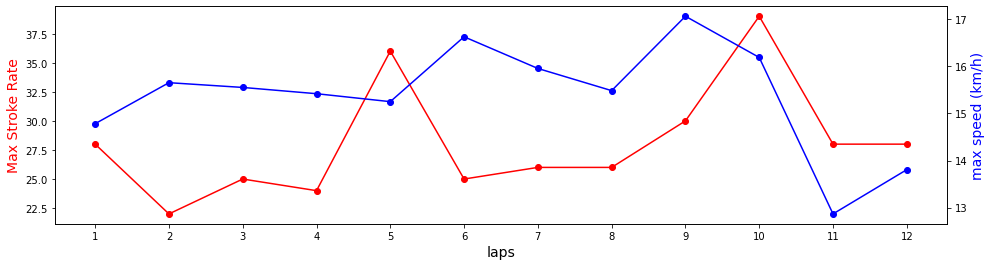

In [27]:
graph.overlay(csv.Laps, csv['Max Stroke Rate'], laps['max speed (km/h)'])

# Avg Distance per Stroke (meters)

In [28]:
csv['Avg Distance per Stroke'].describe()

count    12.000000
mean      8.641667
std       0.952001
min       7.120000
25%       8.162500
50%       8.860000
75%       9.005000
max      10.120000
Name: Avg Distance per Stroke, dtype: float64

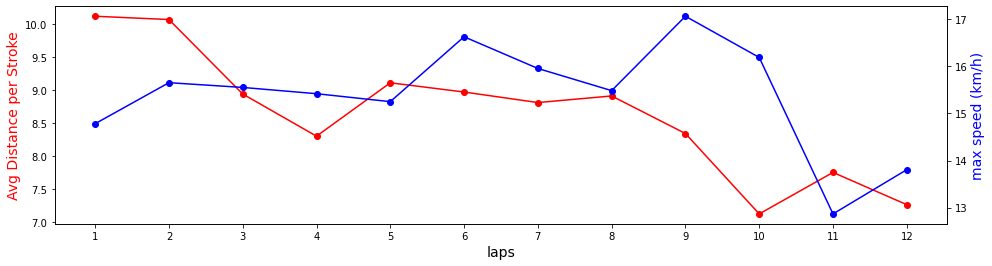

In [29]:
graph.overlay(csv.Laps, csv['Avg Distance per Stroke'], laps['max speed (km/h)'])

# Correlation

In [30]:
csv_corr = csv[['Avg HR', 'Max HR', 'Calories', 'Max Stroke Rate', 'Avg Stroke Rate', 'Power (w)', 'Energy (kj)']]
corr = correlation.get_number(csv_corr)
corr

,Avg HR,Max HR,Calories,Max Stroke Rate,Avg Stroke Rate,Power (w),Energy (kj)
Avg HR,1.000000,0.826557,0.375865,0.560258,0.725956,0.971557,0.375865
Max HR,0.826557,1.000000,0.722703,0.280026,0.801592,0.812243,0.722703
Calories,0.375865,0.722703,1.000000,-0.050449,0.738296,0.338703,1.000000
Max Stroke Rate,0.560258,0.280026,-0.050449,1.000000,0.475164,0.467940,-0.050449
Avg Stroke Rate,0.725956,0.801592,0.738296,0.475164,1.000000,0.630784,0.738296
Power (w),0.971557,0.812243,0.338703,0.467940,0.630784,1.000000,0.338703
Energy (kj),0.375865,0.722703,1.000000,-0.050449,0.738296,0.338703,1.000000


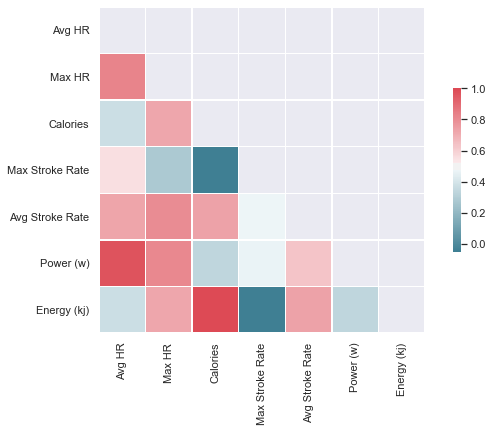

In [31]:
correlation.heatmap(corr)